In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [4]:
df.shape

(37249, 2)

In [5]:
df.sample()['clean_comment'].values

array([' may sheer coincidence but for what worth the raj bhavan bangalore was built aga ali asker professional horse trader tweets lel'],
      dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [7]:
df.isnull().sum()

clean_comment    100
category           0
dtype: int64

In [8]:
df[df['clean_comment'].isna()]

,clean_comment,category
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [9]:
df[df['clean_comment'].isna()]['category'].value_counts()

category
0    100
Name: count, dtype: int64

In [10]:
df.dropna(inplace = True)

In [11]:
df.duplicated().sum()

350

In [12]:
df[df.duplicated()]

,clean_comment,category
375,,0
392,,0
617,aurum mom,0
651,,0
1222,,0
...,...,...
36915,who won,0
37044,,0
37125,hari,0
37158,top kek,1


In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df[df['clean_comment'].str.strip() == '']

,clean_comment,category
181,,0
4432,\n,0
10592,,0
16173,,0
32149,\n,0
34959,,0


In [15]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [16]:
df['clean_comment'] = df['clean_comment'].str.lower()

In [17]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [18]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37241,let the janta decide not ulema clerics,0
37242,hona hai same with vaccination education insu...,0
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [19]:
df['clean_comment'] = df['clean_comment'].str.strip()

In [20]:
df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

0

In [21]:
comments_with_newline = df[df['clean_comment'].str.contains('\n')]
comments_with_newline.head()

,clean_comment,category
448,what missing jpg\nand why this brilliant edit ...,1
781,india has been ruined congress and populist sc...,-1
847,like aap for its stand corruption and making p...,-1
871,reduced trade\ndeficit stronger rupee aren the...,0
1354,amsa press conference australian maritime safe...,1


In [22]:
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex = True)

### EDA


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='category', ylabel='count'>

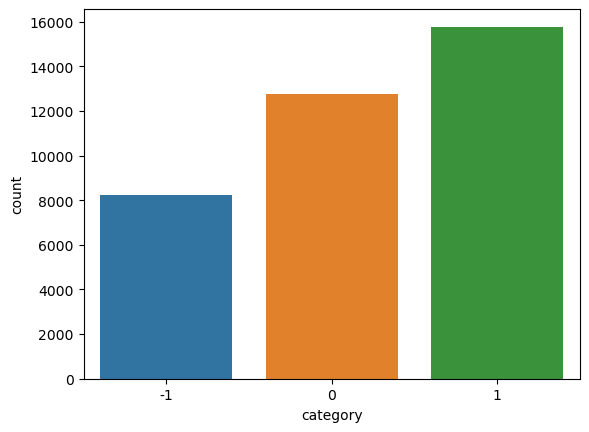

In [24]:
sns.countplot(data = df, x= 'category')

In [25]:
df['category'].value_counts(normalize = True).mul(100).round(2)

category
 1    42.86
 0    34.71
-1    22.42
Name: proportion, dtype: float64

In [26]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

In [27]:
df['clean_comment'].apply(lambda x: len(x.split()))

0         39
1        196
2         86
3         29
4        112
        ... 
37244      1
37245     19
37246      6
37247      2
37248      6
Name: clean_comment, Length: 36793, dtype: int64

In [28]:
df.sample(5)

,clean_comment,category,word_count
3001,one scary fucking individual with lot followers,-1,7
11639,not sure how big dates,-1,5
36648,that explains why the likes dayanidhi maran st...,-1,58
8652,you might want add the list pakistani denials ...,-1,144
26021,gutesci marlhi daud uai medder dugianam quifal...,-1,237


/Users/bonniecoleman/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bonniecoleman/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


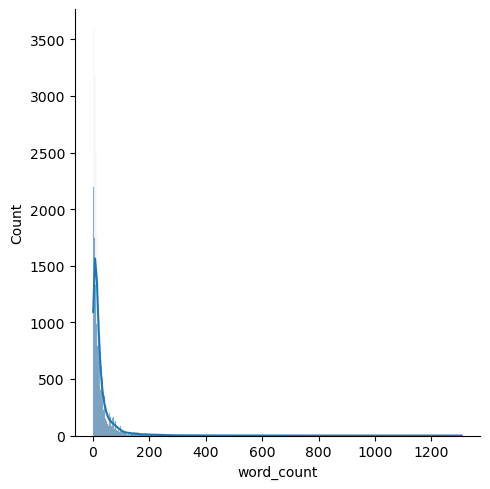

In [29]:
sns.displot(df['word_count'], kde= True);

/Users/bonniecoleman/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bonniecoleman/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bonniecoleman/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


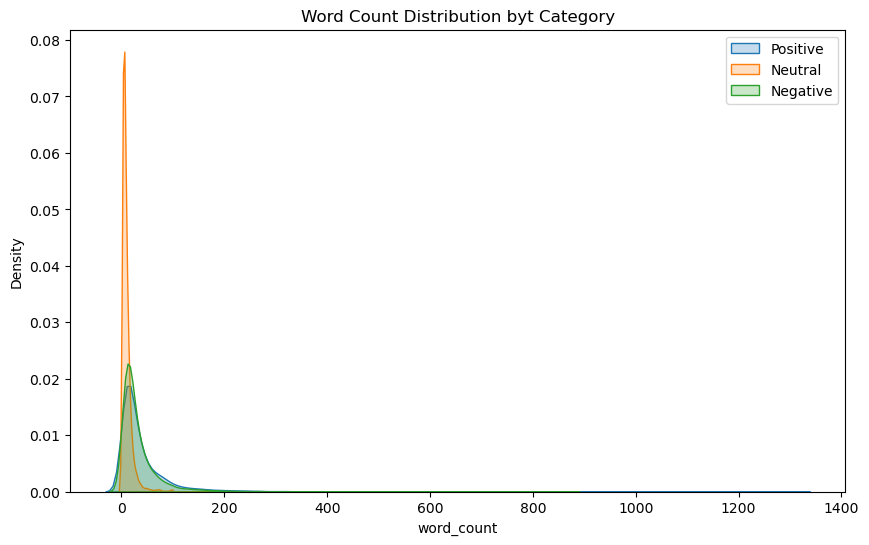

In [30]:
plt.figure(figsize = (10, 6))

sns.kdeplot(df[df['category'] == 1]['word_count'], label = 'Positive', fill = True)

sns.kdeplot(df[df['category'] == 0]['word_count'], label = 'Neutral', fill = True)

sns.kdeplot(df[df['category'] == -1]['word_count'], label = 'Negative', fill = True)

plt.title('Word Count Distribution byt Category')
plt.legend()
plt.show()

<Axes: >

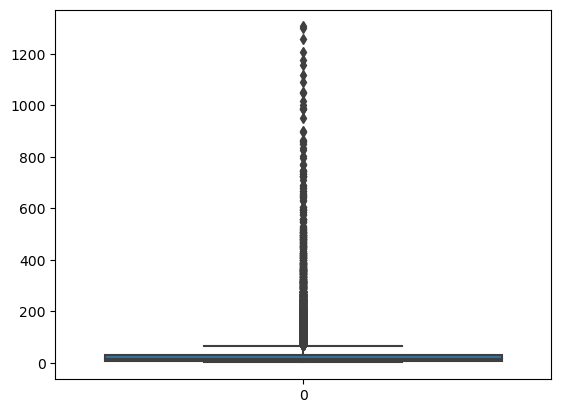

In [31]:
sns.boxplot(df['word_count'])

<Axes: xlabel='category', ylabel='word_count'>

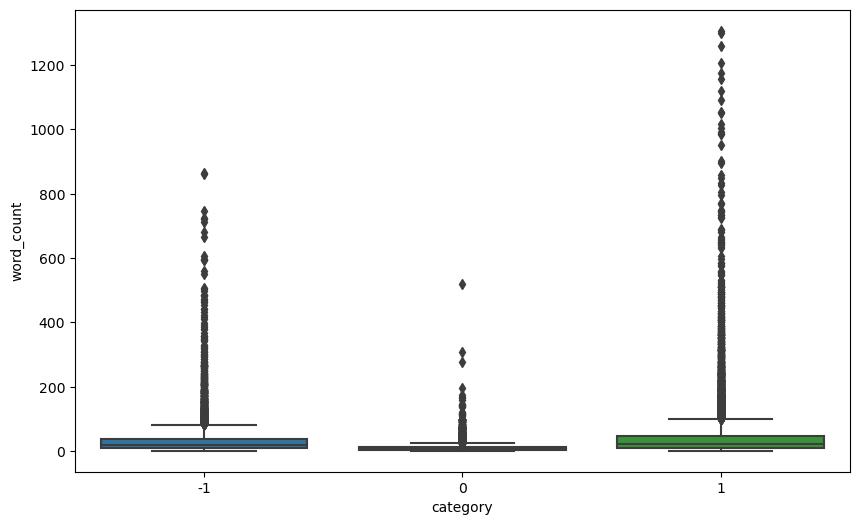

In [32]:
plt.figure(figsize = (10, 6))
sns.boxplot(df, x ='category', y='word_count')

<Axes: xlabel='category', ylabel='word_count'>

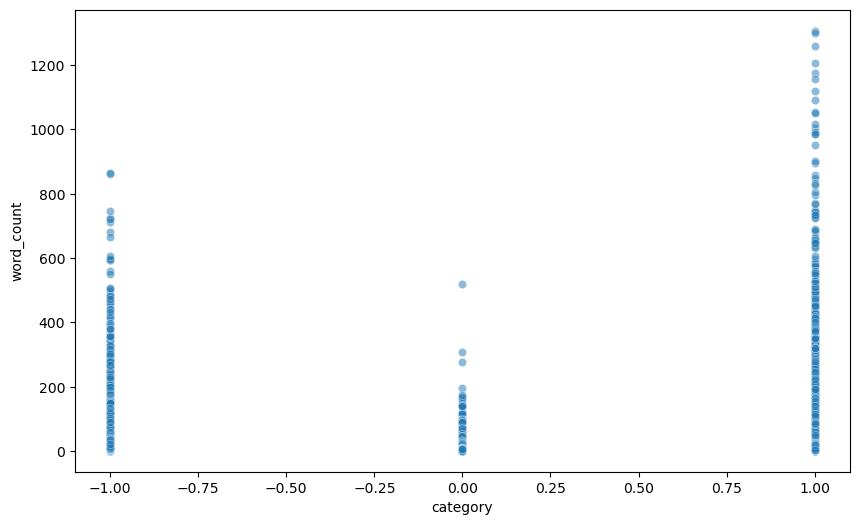

In [33]:
plt.figure(figsize = (10, 6))
sns.scatterplot(df, x ='category', y='word_count', alpha = 0.5)

<Axes: xlabel='category', ylabel='word_count'>

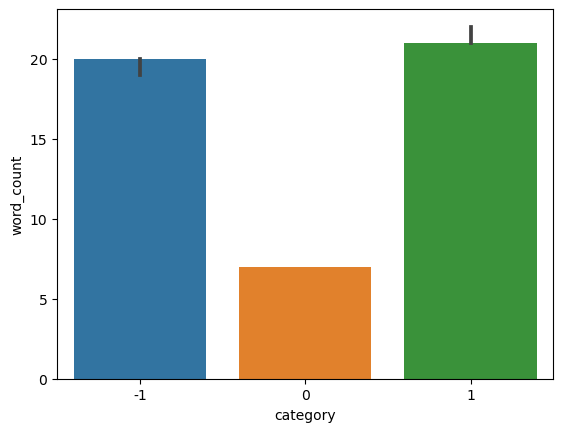

In [34]:
sns.barplot(df, x= 'category', y = 'word_count', estimator = 'median')

In [35]:
from nltk.corpus import stopwords
import nltk

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bonniecoleman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
stop_words = stopwords.words('english')

In [38]:
len(stop_words)

198

In [39]:
df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

In [40]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
8601,now picture the pigeon getting the good cop ba...,1,11,3
4564,better hide before the british show their ship...,1,12,6
5736,several members the group hindu yuva vahini to...,-1,128,43
34499,haven seen this much shit since the last time ...,-1,17,4
30997,dad not changing from toi forget that watching...,1,17,5


/Users/bonniecoleman/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_stop_words', ylabel='Count'>

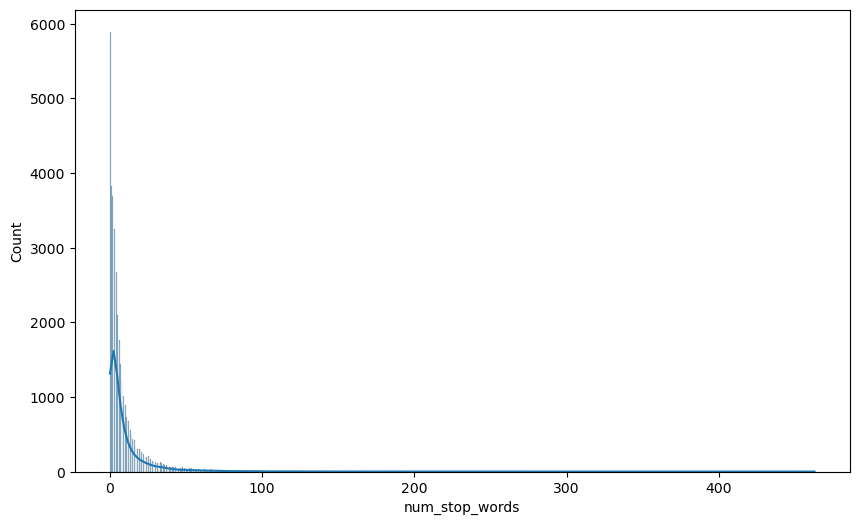

In [41]:
plt.figure(figsize = (10, 6))
sns.histplot(df['num_stop_words'], kde = True)

/Users/bonniecoleman/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bonniecoleman/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/bonniecoleman/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


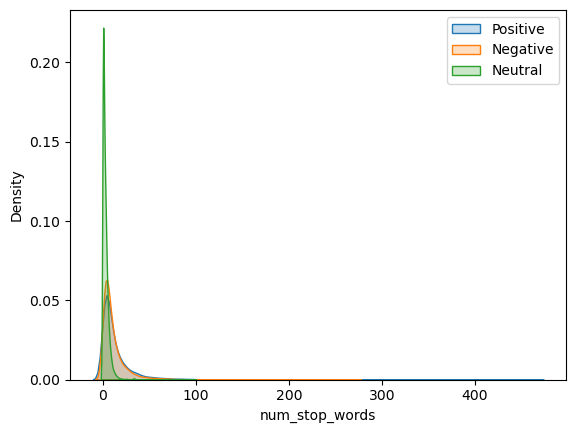

In [42]:
sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label = 'Positive', fill = True)
sns.kdeplot(df[df['category'] == -1]['num_stop_words'], label = 'Negative', fill = True)
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label = 'Neutral', fill = True)
plt.legend()
plt.show();

<Axes: xlabel='category', ylabel='num_stop_words'>

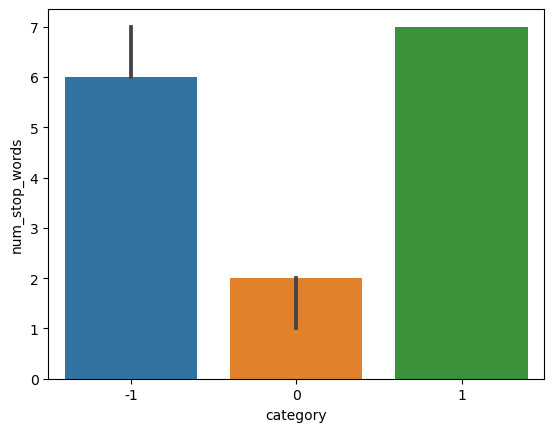

In [43]:
sns.barplot(df, x = 'category', y = 'num_stop_words', estimator = 'median')

In [44]:
from collections import Counter 

In [45]:
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

In [46]:
most_common_stop_words = Counter(all_stop_words).most_common(25)

In [48]:
top_25_df = pd.DataFrame(most_common_stop_words, columns = ['stop_word', 'count'])

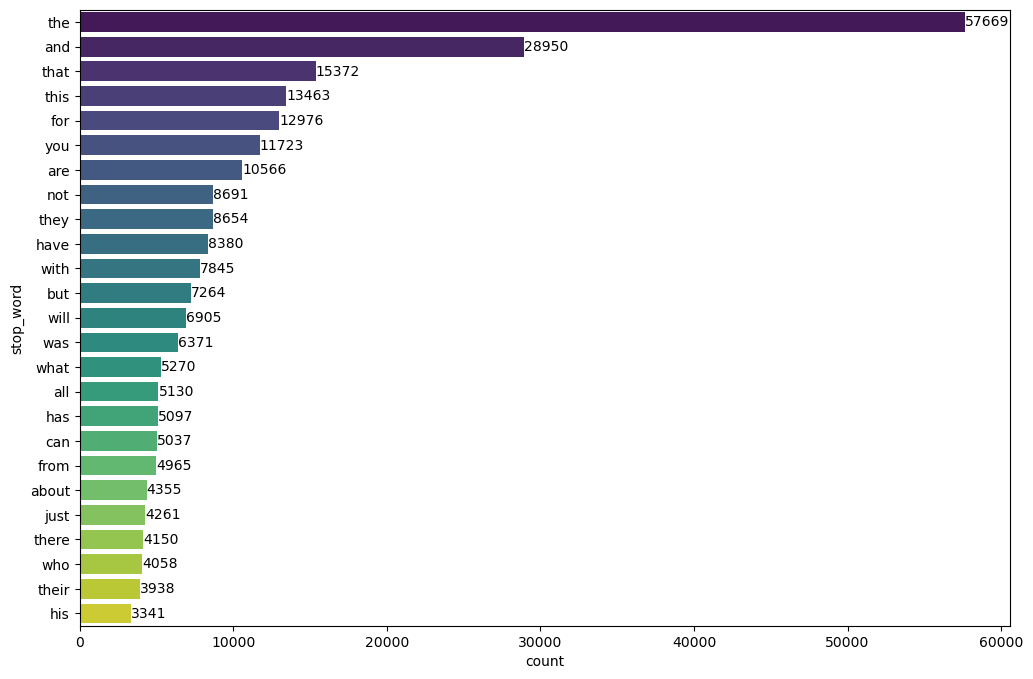

In [53]:
plt.figure(figsize = (12, 8))
ax = sns.barplot(top_25_df, x='count', y='stop_word', palette='viridis')
for container in ax.containers:
    ax.bar_label(container)

In [54]:
df['num_chars'] = df['clean_comment'].apply(len)

In [55]:
df

,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon have never tried explain them th...,1,39,13,259
1,buddhism has very much lot compatible with chr...,1,196,59,1268
2,seriously don say thing first all they won get...,-1,86,40,459
3,what you have learned yours and only yours wha...,0,29,15,167
4,for your own benefit you may want read living ...,1,112,45,690
...,...,...,...,...,...
37244,jesus,0,1,0,5
37245,kya bhai pure saal chutiya banaya modi aur jab...,1,19,0,99
37246,downvote karna tha par upvote hogaya,0,6,0,36
37247,haha nice,1,2,0,9


In [56]:
df['num_chars'].describe()

count    36793.000000
mean       181.852798
std        359.702163
min          1.000000
25%         38.000000
50%         80.000000
75%        184.000000
max       8664.000000
Name: num_chars, dtype: float64

In [57]:
all_text = ' '.join(df['clean_comment'].values)

In [63]:
char_frequency = Counter(all_text)
char_frequency_df = pd.DataFrame(char_frequency.items(), columns = ['character', 'frequency']).sort_values(by = 'frequency', ascending = False)

In [ ]:
df['num_punctuation_chars'] = df['clean_comment'].apply(lambda x: sum([1 for char in x if char in '.,!?;:"\'(){}[]-']))

In [70]:
df.sort_values(by = 'num_punctuation_chars', ascending = False).head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
24795,hey there are lot whatsapp forward like this a...,1,84,37,498,0
24789,stop fighting dead enemies and stop fighting f...,1,21,8,122,0
24790,really solid reply must add mention about how ...,1,91,26,582,0
24791,weird flex but,-1,3,1,14,0


In [71]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def get_top_ngrams(corpus, n =None):
    vec = CountVectorizer(ngram_range = (2, 2), stop_words ='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(words, sum_words[0, idx]) for words, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [77]:
top_25_bigrams = get_top_ngrams(df['clean_comment'], n = 25)

In [81]:
def get_top_trigrams(corpus, n =None):
    vec = CountVectorizer(ngram_range = (3, 3), stop_words ='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(words, sum_words[0, idx]) for words, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [82]:
top_25_trigrams = get_top_trigrams(df['clean_comment'], n = 25)

In [83]:
top_25_trigrams

[('free encyclopedia team', 598),
 ('good good good', 385),
 ('encyclopedia team reached', 316),
 ('movie movie movie', 266),
 ('team reached free', 224),
 ('reached free encyclopedia', 223),
 ('lot lot lot', 214),
 ('best overall submitter', 204),
 ('overall submitter best', 195),
 ('submitter best overall', 194),
 ('encyclopedia team sports', 174),
 ('best overall post', 168),
 ('overall post best', 160),
 ('post best overall', 158),
 ('good bollywood movie', 151),
 ('bollywood movie good', 145),
 ('movie good bollywood', 144),
 ('thing thing thing', 117),
 ('time time time', 109),
 ('news items credits', 105),
 ('items credits sr33', 103),
 ('kya kya kya', 93),
 ('minister narendra modi', 92),
 ('prime minister narendra', 92),
 ('team reached greece', 91)]

In [87]:
import re 

df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

In [88]:
all_text = ' '.join(df['clean_comment'].values)

In [92]:
char_frequency = Counter(all_text)

In [94]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon have never tried explain them th...,1,39,13,259,0
1,buddhism has very much lot compatible with chr...,1,196,59,1268,0
2,seriously don say thing first all they won get...,-1,86,40,459,0
3,what you have learned yours and only yours wha...,0,29,15,167,0
4,for your own benefit you may want read living ...,1,112,45,690,0


In [95]:
from nltk.corpus import stopwords

In [97]:
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

In [99]:
df['clean_comment'] = df['clean_comment'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

In [102]:
from nltk.stem import WordNetLemmatizer 

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bonniecoleman/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [107]:
lemmatizer = WordNetLemmatizer()
df['clean_comment'] = df['clean_comment'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [105]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [111]:
from wordcloud import WordCloud

In [112]:
def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color = 'white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

In [127]:
def plot_top_n_words(df, n = 20):
    words = ' '.join(df['clean_comment']).split()
    
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    words, counts = zip(*most_common_words)

    plt.figure(figsize=(12, 10))
    ax = sns.barplot(x=list(counts), y = list(words))
    ax.bar_label(ax.containers[0])
    plt.show()

In [131]:
def plot_top_n_words_by_category(df, n=20, start=0):
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category  = row['category']

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = {-1:0, 0:0, 1:0}

            word_category_counts[word][category] += 1

    total_word_counts = {words: sum(counts.values()) for words, counts in word_category_counts.items()}
    most_common_words = sorted(total_word_counts.items(), key = lambda x: x[1], reverse = True)[start:start + n]
    top_words = [word for word, count in most_common_words]

    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    plt.figure(figsize = (12, 10))
    bar_width = 0.75 

    plt.barh(word_labels, negative_counts, color = 'red', label = 'Negative', height = bar_width)
    plt.barh(word_labels, neutral_counts, left = negative_counts, color = 'gray', label = 'Neutral', height = bar_width)
    plt.barh(word_labels, positive_counts, left = [i+j for i, j in zip(negative_counts, neutral_counts)], color = 'green', label = 'Positive', height = bar_width)

    plt.legend(title = 'Sentiment', loc = 'lower right')
    plt.gca().invert_yaxis()
    plt.show()


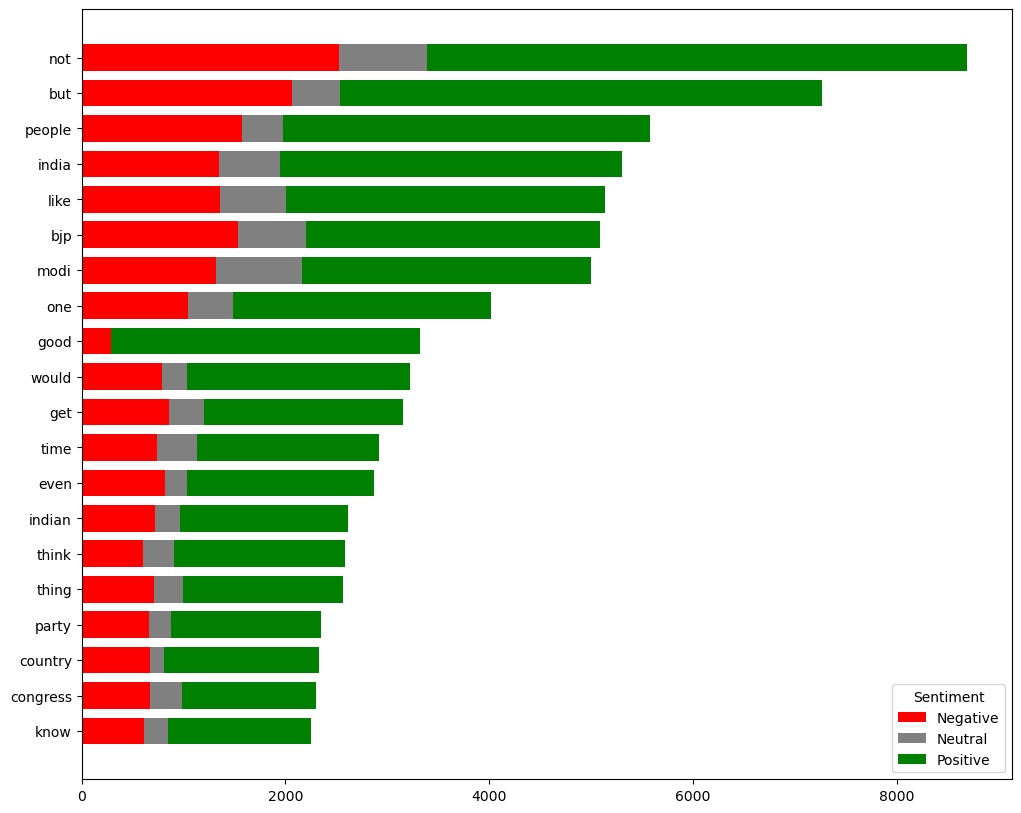

In [132]:
plot_top_n_words_by_category(df, n = 20, start =0)